# Ionic current driving term comparison

Two common models are used for the "driving term" of ionic currents.

## Linear (Ohmic)

The simplest model assumes a linear I-V relationship, proportional to the difference between the membrane potential and the ion's reversal potential:

$$ I_x^{Ohm} = g_x (V - V_x) $$

where $I_x$ is current (nA), $g_x$ is conductance ($\mu$S), $V$ is the membrane potential (mV), and $V_x$ is the Nernst potential (mV).
Recognising this equation as $V = I R$ in disguise we call this an _Ohmic_ current model.

Note that the Nernst potential can be derived from thermodynamical principles, and is independent of the choice of current model.
It is given by

$$ V_x = \frac{RT}{z_xF} \log \frac{[X]_e}{[X]_i}.$$

Here $[X]_e$ and $[X]_i$ are the external and internal ionic concentrations (in mM=mmol/L), $z_x$ is the valence of the ion, $R$ is the gas constant, F is the Faraday constant, and T is temperature.
We use
\begin{align}
R &= 8314 \; \text{mJ} / \text{K} / \text{mol} \\
T &= 273 + 37 = 310 \; \quad \text{K} \\
F &= 96485 \; \text{C} / \text{mol}
\end{align}
so that
$$ \frac{RT}{F} \approx 26.7 \text{mV} $$
and we can use $V$ in mV.

Note that the Nernst potential is a solid thermodynamical result, that holds whether or not we assume linear currents.

## Goldman-Hogdkin-Katz (GHK)

This model can be derived from thermodynamics, by assuming a constant electric field within the channel (see Keener & Sneyd):

$$ I_x^{GHK} = P_x \frac{z_x^2F^2}{RT}V \frac{[X]_i - [X]_e \exp(-V \frac{z_x F}{RT})}{1 - \exp(-V \frac{z_x F}{RT})} $$

Where $V \frac{z_x F}{RT}$ is dimensionless, and $P_x$ is a *permeability*, in units (nA / mM).

Like the linear approximation, GKH currents are zero when $V = V_x$.
They are _not_ necessarily zero when $V$ is zero, which can be seen by using [L'Hôpital's rule](https://en.wikipedia.org/wiki/L%27H%C3%B4pital%27s_rule) to find the limit of $I_x$ when $V$ approaches zero.

## How do they relate to each other?

To see the relationship between the two models, we can linearise the GHK equation around $V = V_r$ (where both models predict the same value).

Using a [first order approximation](https://en.wikipedia.org/wiki/Linearization) we find:

$$ L(V) = I_x(V_x) + I_x'(V_x) (V - V_x) $$

where

$$ I_x'(V_x) = \frac{dI_x}{dV} \bigg\rvert_{V = V_x} $$

Since $I_x(V_x) = 0$, we find $L(V) = I_x'(V_x) (V - V_x)$, so we can view the Ohmic model as a linearisation of the GHK model around $V = V_r$, with $g_x = I_x'(V_x)$.

To work out the relationship between $P_x$ and $g_x$ we need to write out the derivativate $I_x'(V_x)$, and to make this easier we now introduce some temporary shorthand notation:
\begin{align}
x_i &= [X]_i \\
x_e &= [X]_e \\
\alpha &= \frac{RT}{z_xF} \\
\beta(V) &= \exp(-V \frac{z_x F}{RT}) = \exp(-V/\alpha)
\end{align}

So that

$$ I_x'(V) = \frac{d}{dV} I_x^{GHK} = P_x \frac{z_x F}{\alpha} \frac{d}{dV} \left( V \frac{x_i - x_e \beta}{1 - \beta} \right) $$

to solve this we'll need $ \frac{d}{dV} (x_i - x_e \beta) = \beta\frac{x_e}{\alpha} $ and $ \frac{d}{dV} (1 - \beta) = \beta\frac{1}{\alpha} $

so that

$$ I_x'(V) = P_x \frac{z_x F}{\alpha} \left( 
    \frac{x_i - x_e \beta}{1 - \beta}
    + V \frac{
        \beta\frac{x_e}{\alpha}(1 - \beta) 
        - \beta\frac{1}{\alpha}(x_i - x_e \beta)}
        {(1 - \beta)^2}
    \right) $$

we then evaluate at $V_x$ to find

$$ \beta(V_x) = \exp(-V_x / \alpha) = \exp(-\log(x_e / x_i)) = \frac{x_i}{x_e}$$

and

\begin{align}
I_x'(V_x) 
&= I_x'(V) = P_x \frac{z_x F}{\alpha} \left( 
    \frac{x_i - x_e \frac{x_i}{x_e}}{1 - \frac{x_i}{x_e}}
    + V_x \frac{
        \frac{x_i}{x_e}\frac{x_e}{\alpha}(1 - \frac{x_i}{x_e}) 
        - \frac{x_i}{x_e}\frac{1}{\alpha}(x_i - x_e \frac{x_i}{x_e})}
    {(1 - \frac{x_i}{x_e})^2}
    \right) \\
&= I_x'(V) = P_x \frac{z_x F}{\alpha} \left( 
    V_x \frac{\frac{x_i}{\alpha}(1 - \frac{x_i}{x_e})}{(1 - \frac{x_i}{x_e})^2}
    \right) \\
&= I_x'(V) = P_x \frac{z_x F}{\alpha^2} \left( 
    V_x \frac{x_i}{1 - \frac{x_i}{x_e}}
    \right) \\
&= I_x'(V) = P_x \frac{z_x F}{\alpha^2} V_x \left(\frac{x_i x_e}{x_e - x_i}\right) \\
&= I_x'(V) = P_x \frac{z_x F}{\alpha} \left(\frac{x_i x_e}{x_e - x_i}\right) \log\frac{x_e}{x_i} \\
\end{align}

Or

$$ g_x = P_x \frac{z_x^2 F^2}{RT} \left(\frac{[X]_e [X]_i}{[X]_e - [X]_i}\right) \log\frac{[X]_e}{[X]_i} $$

and

$$ P_x = g_x \frac{RT}{z_x^2 F^2} \frac{[X]_e - [X]_i}{[X]_e [X]_i \log\left([X]_e/[X]_i\right)} $$

## Can we get some numbers?

The following table summarises internal values given in _Alberts et al. (2008) Molecular Biology of the Cell, 5th edition, page 652_; and _Guyton & Hall (2011) Textbook of Medical Physiology, 12th edition, page 7.

| Ion       | Internal | External |
|-----------|----------|----------|
| Sodium    | 5-15 mM  | 142 mM   |
| Potassium | 140 mM   | 4.2 mM   |
| Calcium   | 0.1 uM   | 1.2 mM   |
| Chloride  | 5-15 mM  | 108 mM   |

(Note that cardiac models like slightly different values, e.g. $[K^+]_o = 5.4$ mM and $[Ca^{2+}]_o = 2$ mM).

Looking at the equation for $g_x$, it seems like $[X]_e / [X]_i$ will have a strong influence.
We can reparametrise using $\epsilon = [X]_e / [X]_i$ to find:

\begin{align}
g_x &= P_x \frac{z_x^2 F^2}{RT} \left(\frac{[X]_i}{1 - \epsilon}\right) \log \epsilon \\
    &= P_x \frac{z_x^2 F^2}{RT} [X]_e \frac{\epsilon}{1 - \epsilon} \log \epsilon
\end{align}

We can revisit the data above, doing a bit of guessing and rounding, to find

| Ion       | Internal | External | Epsilon | Log eps | Term   |
|-----------|----------|----------|---------|---------|--------|
| Sodium    | 10 mM    | 140 mM   | 14      | 2.639   | -398   |
| Potassium | 140 mM   | 4.2 mM   | 0.03    | -3.507  | -0.455 |
| Calcium   | 0.1 uM   | 1.2 mM   | 12000   | 9.39    | -22.5  |
| Chloride  | 10 mM    | 110 mM   | 11      | 2.398   | 290    |

where "Term" is $z_x^2 [X]_e \frac{\epsilon}{1 - \epsilon} \log \epsilon$.

So, assuming the permeabilities are more or less the same, we might expect strong sodium and chloride currents, and weaker calcium and potassium currents?

## When is the linearisation a good approximation?

To find this out, we _could_ try working out the next term in the Taylor series the linearization is based on, but that involves a lot of differentiating...

Another approach is to write down an equation for $ I_x^\text{Ohm} / I_x^\text{GHK} $:

\begin{align}
\frac{I_x^\text{Ohm}}{I_x^\text{GHK}}
&= \frac{
    P_x \frac{z_xF}{\alpha} x_e \frac{\epsilon}{1 - \epsilon} \log \epsilon (V - \alpha \log{\epsilon})
}{
    P_x \frac{z_xF}{\alpha}V \frac{x_i - x_e \exp(-V/\alpha)}{1 - \exp(-V/\alpha)}
} \\
&= \frac{
    x_e \frac{\epsilon}{1 - \epsilon} \log \epsilon (V - \alpha \log{\epsilon})
}{
    V \frac{x_i - x_e \exp(-V/\alpha)}{1 - \exp(-V/\alpha)}
} \\
&= \frac{x_e \frac{\epsilon}{1 - \epsilon} \log \epsilon}{x_i - x_e \exp(-V/\alpha)}
   \frac{V - \alpha \log{\epsilon}}{V}
   (1 - \exp(-V/\alpha)) \\
&= \frac{\frac{\epsilon}{1 - \epsilon} \log \epsilon}{1/\epsilon - \exp(-V/\alpha)}
   \frac{V - \alpha \log{\epsilon}}{V}
   (1 - \exp(-V/\alpha)) \\
&= \frac{\frac{\epsilon^2}{1 - \epsilon} \log \epsilon}{1 - \epsilon \exp(-V/\alpha)}
   \frac{V - \alpha \log{\epsilon}}{V}
   (1 - \exp(-V/\alpha)) \\
&= \frac{\epsilon^2}{1 - \epsilon} \log \epsilon
   \frac{V - \alpha \log{\epsilon}}{V}
   \frac{1 - \exp(-V/\alpha)}{1 - \epsilon \exp(-V/\alpha)}
\end{align}

Ugly as this is, it seems to be independent of the absolute values of the concentrations. 
It does still depend on the valence through alpha.

We can try plotting this expression for the different ions mentioned above.

-109.28720043491526


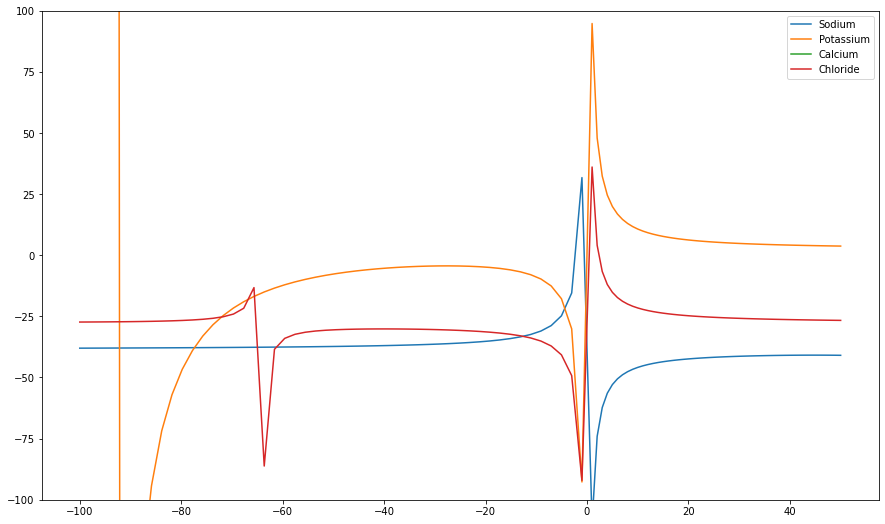

In [58]:
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(1, 1, 1)

v = np.concatenate((np.linspace(-100, -1), np.linspace(1, 50))) + 1e-9

def f(e, z):
    a = R * T / (z * F)
    x = e * e * np.log(e) / (1 - e)
    x += (v - a * np.log(e)) / v
    ev = np.exp(-v / a)
    x += (1 - ev) / (1 - e * ev)
    return x

ax.plot(v, f(14, 1), label='Sodium')
ax.plot(v, f(0.03, 1), label='Potassium')
ax.plot(v, f(12000, 2), label='Calcium')
ax.plot(v, f(11, -1), label='Chloride')


print(np.min(f(14, 1)))

ax.set_ylim(-100, 100)

plt.legend()
plt.show()

## Graphical comparison

We can now plot a few graphs comparing the GHK equation to an Ohmic model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

R = 8314        # mJ / K / mol
T = 273 + 37    # K
F = 96485       # C / mol

def peq(Xi, Xe, g=1, z=1):
    """ Return equivalent P for a given g. """
    return g * R * T * (Xe - Xi) / (z * z * F * F * Xi * Xe * np.log(Xe / Xi))

def ghk(V, Xi, Xe, g=1, z=1):
    zv = V * z * F / (R * T)
    ev = np.exp(-zv)
    return peq(Xi, Xe, g, z) * zv * z * F * (Xi - Xe * ev) / (1 - ev)

def nernst(Xi, Xe, z=1):
    return R * T / (z * F) * np.log(Xe / Xi)

def ohm(V, Xi, Xe, g=1, z=1):
    return g * (V - nernst(Xi, Xe, z))

### Sodium

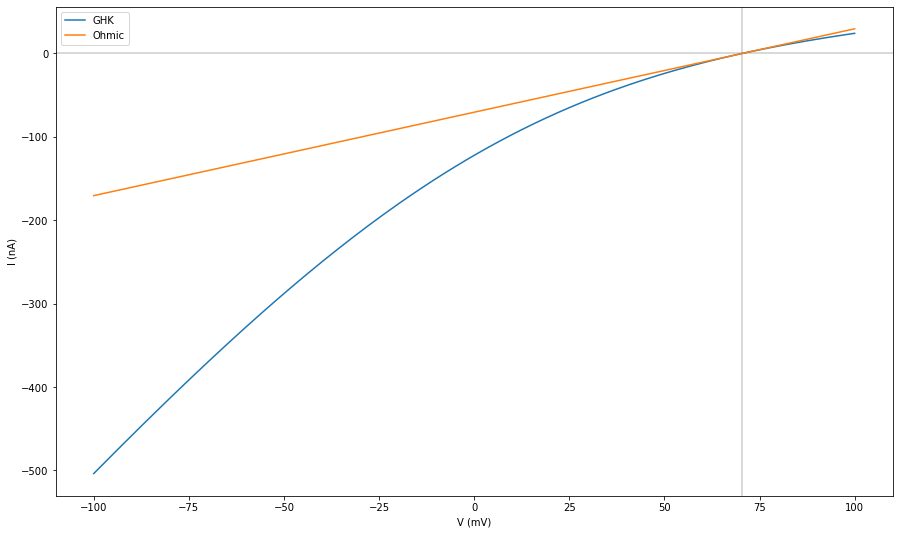

In [41]:
nai = 10
nae = 140
vna = np.linspace(-100, 100, 201) + 1e-9

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('V (mV)')
ax.set_ylabel('I (nA)')
ax.axhline(0, color='k', alpha=0.2)
ax.axvline(nernst(nai, nae), color='k', alpha=0.2)
ax.plot(vna, ghk(vna, nai, nae), label='GHK')
ax.plot(vna, ohm(vna, nai, nae), label='Ohmic')
plt.legend()
plt.show()

In [42]:
nernst(nai, nae)

70.49539325191056

### Potassium

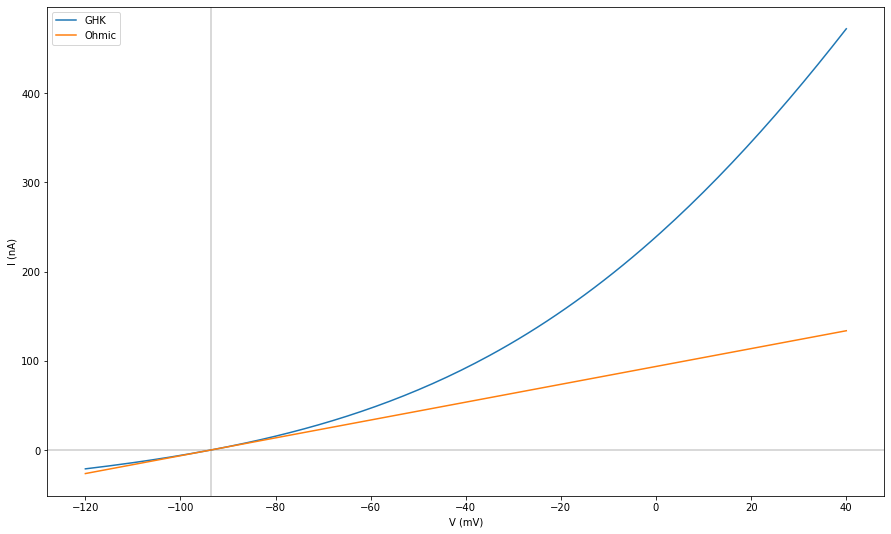

In [43]:
ki = 140
ke = 4.2
vk = np.linspace(-120, 40, 161) + 1e-9

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('V (mV)')
ax.set_ylabel('I (nA)')
ax.axhline(0, color='k', alpha=0.2)
ax.axvline(nernst(ki, ke), color='k', alpha=0.2)
ax.plot(vk, ghk(vk, ki, ke), label='GHK')
ax.plot(vk, ohm(vk, ki, ke), label='Ohmic')
plt.legend()
plt.show()

In [44]:
nernst(ki, ke)

-93.66836224365116

### Calcium

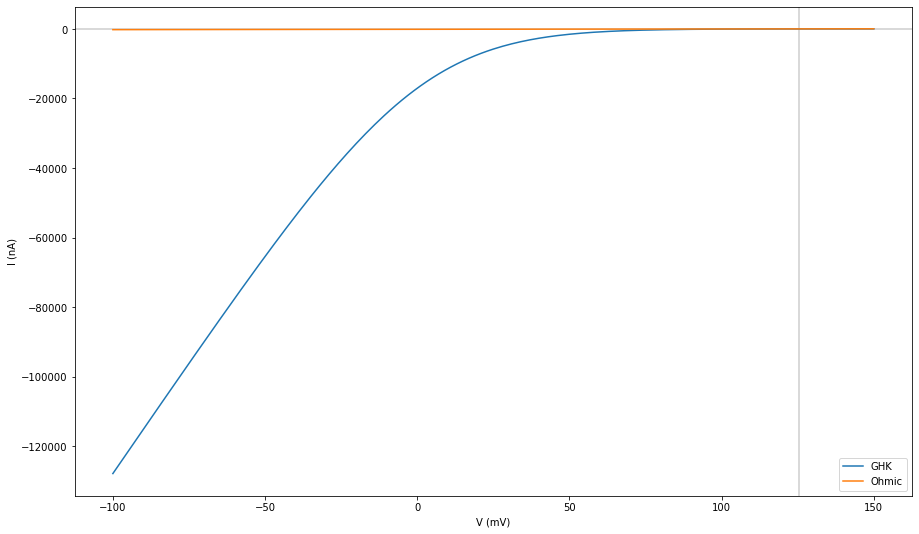

In [45]:
cai = 1e-4
cae = 1.2
vca = np.linspace(-100, 150, 251) + 1e-9

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('V (mV)')
ax.set_ylabel('I (nA)')
ax.axhline(color='k', alpha=0.2)
ax.axvline(nernst(cai, cae, z=2), color='k', alpha=0.2)
ax.plot(vca, ghk(vca, cai, cae, z=2), label='GHK')
ax.plot(vca, ohm(vca, cai, cae, z=2), label='Ohmic')
plt.legend()
plt.show()

In [46]:
nernst(cai, cae, z=2)

125.44998339377325

### Chloride

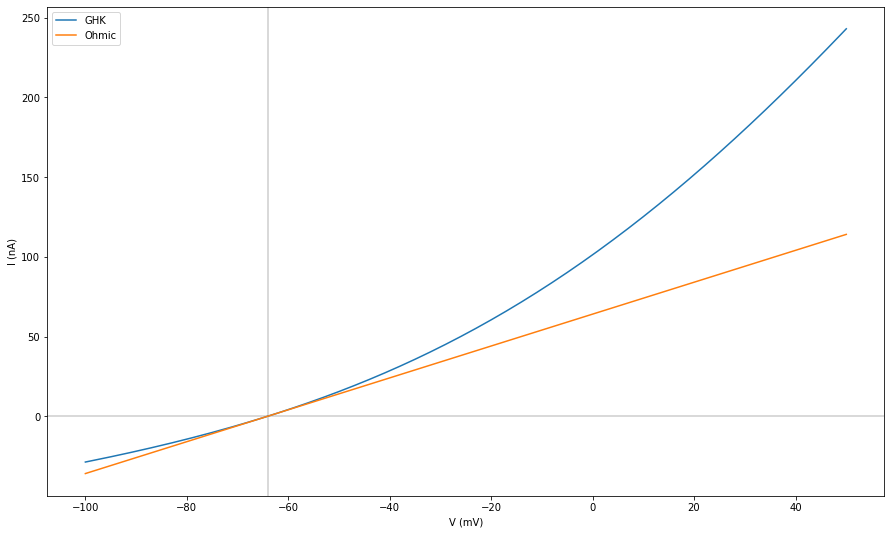

In [8]:
vcl = np.linspace(-100, 50, 151) + 1e-9
cli = 10
cle = 110

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('V (mV)')
ax.set_ylabel('I (nA)')
ax.axhline(color='k', alpha=0.2)
ax.axvline(nernst(cli, cle, z=-1), color='k', alpha=0.2)
ax.plot(vcl, ghk(vcl, cli, cle, z=-1), label='GHK')
ax.plot(vcl, ohm(vcl, cli, cle, z=-1), label='Ohmic')
plt.legend()
plt.show()

In [9]:
nernst(cli, cle, z=-1)

-64.05339070730324

## Small voltages

Instead of linearising around $V_x$, we can also try approximating $I_x^\text{GHK}$ for small voltages.

The Taylor expansion for $e^x$ is
$$ e^x = 1 + \frac{x}{1!} + \frac{x^2}{2!} + \frac{x^3}{3!} + ... .$$
For $|x| < 1$ each successive term is smaller than the last.

For $\exp(-V \frac{z_x F}{RT})$ with $z_x = +1$ that means when $|V| < 26.7$.

We can try it out with a few terms, and see it's still quite a poor approximation:

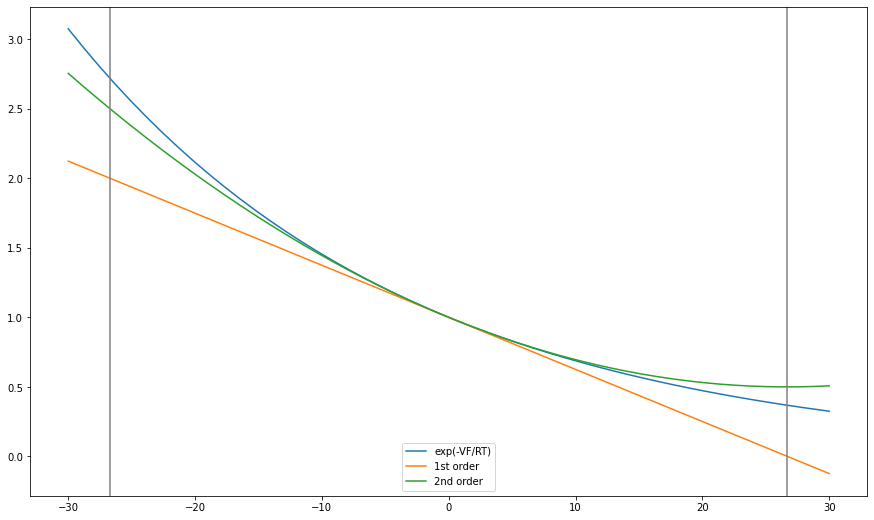

In [10]:
import numpy as np
import matplotlib.pyplot as plt

R = 8314        # mJ / K / mol
T = 273 + 37    # K
F = 96485       # C / mol

v = np.linspace(-30, 30)

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(1, 1, 1)
ax.plot(v, np.exp(-v * F / (R * T)), label='exp(-VF/RT)')
ax.plot(v, 1 - v * F / (R * T), label='1st order')
ax.plot(v, 1 - v * F / (R * T) + 0.5 * (v * F / (R * T))**2, label='2nd order')
ax.axvline(-R * T / F, color='gray')
ax.axvline(+R * T / F, color='gray')
plt.legend()
plt.show()

So keeping in mind that it only works for _really_ small $V$, we can continue down this path.

First, let
\begin{align}
\alpha &= \frac{RT}{z_xF} \\
x_i &= [X]_i \\
x_e &= [X]_e
\end{align}

Then
\begin{align}
I_x &= P_x z_x F \frac{V}{\alpha} \left[ \frac{x_i - x_e \exp(-V / \alpha)}{1 - \exp(-V / \alpha)} \right] \\
&\approx P_x z_x F \frac{V}{\alpha} \left[ \frac{x_i - x_e (1 - V/\alpha)}{1 - (1 - V/\alpha)} \right] \\
&= P_x z_x F \left[ x_i - x_e (1 - V/\alpha) \right] \\
&= P_x z_x F \left[ x_i - x_e + V x_e / \alpha) \right]\\
&= P_x \frac{z_x F x_e}{\alpha} \left[ \alpha \frac{x_i - x_e}{x_e} + V) \right]\\
&= P_x \frac{z_x F x_e}{\alpha} \left( V - \alpha \frac{x_e - x_i}{x_e} \right)
\end{align}

This is linear in V, but has an unusual reversal potential.
We can see what's going on by deriving a first order approximation of $V_x$.
From [wikipedia](https://en.wikipedia.org/wiki/Taylor_series#List_of_Maclaurin_series_of_some_common_functions) we get $\log(1 - x) \approx -x$, so we rewrite to get that form and then apply the approximation:

\begin{align}
V_x &= \frac{RT}{zF} \log(x_e / x_i) \\
&= -\frac{RT}{zF} \log(x_i / x_e) \\
&= -\alpha \log(1 - (1 - x_i / x_e)) \\
&= -\alpha \log \left(1 - \frac{x_e - x_i}{x_e} \right) \\
&\approx -\alpha \cdot - \frac{x_e - x_i}{x_i} \\
&= \alpha \frac{x_e - x_i}{x_i}
\end{align}

Since they are approximately equivalent, we can substitute $V_r$ back into the equation to obtain:

\begin{align}
I_x &= P_x \frac{z_x F x_e}{\alpha} (V - V_x) \\
&= P_x [X]_e \frac{z_x^2 F^2}{R T} (V - V_x)
\end{align}

This is a useful result, as it lets us relate the two models, for small $V$:

$$ g_x \approx P_x [X]_e \frac{z_x^2 F^2}{R T} $$

With the values above we get

In [11]:
F * F / (R * T)

3612.001220250336

so that we can see that the value for $g_x$ will be a few orders of magnitude bigger than $P_x [X]_e$.

We can replot the calcium graph using this value:

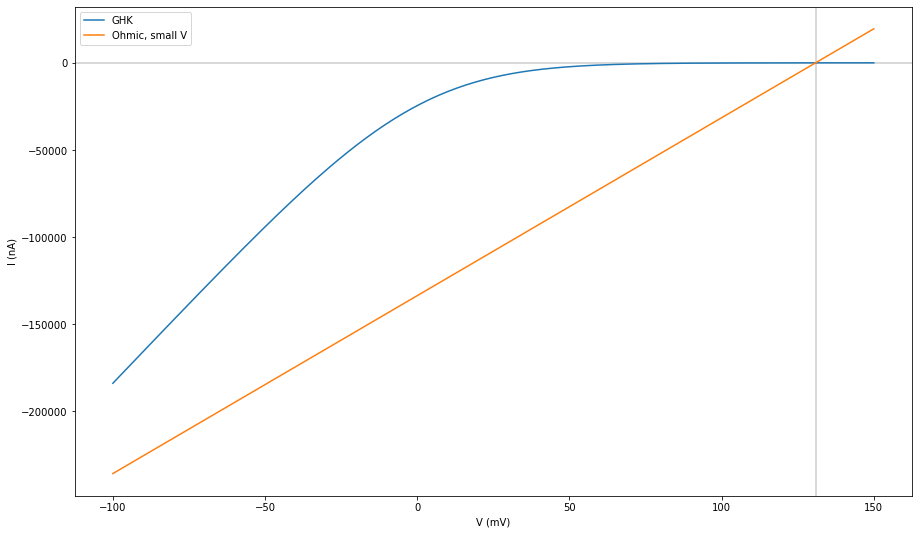

In [38]:
gk = peq(cai, cae, z=2) * 4 * F * F / (R * T)

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('V (mV)')
ax.set_ylabel('I (nA)')
ax.axhline(color='k', alpha=0.2)
ax.axvline(nernst(cai, cae, z=2), color='k', alpha=0.2)
ax.plot(vca, ghk(vca, cai, cae, z=2), label='GHK')
ax.plot(vca, ohm(vca, cai, cae, z=2, g=gk), label='Ohmic, small V')
plt.legend()
plt.show()

## Arbitrary

That got a bit messy, so we can just draw an arbitrary straight line instead?

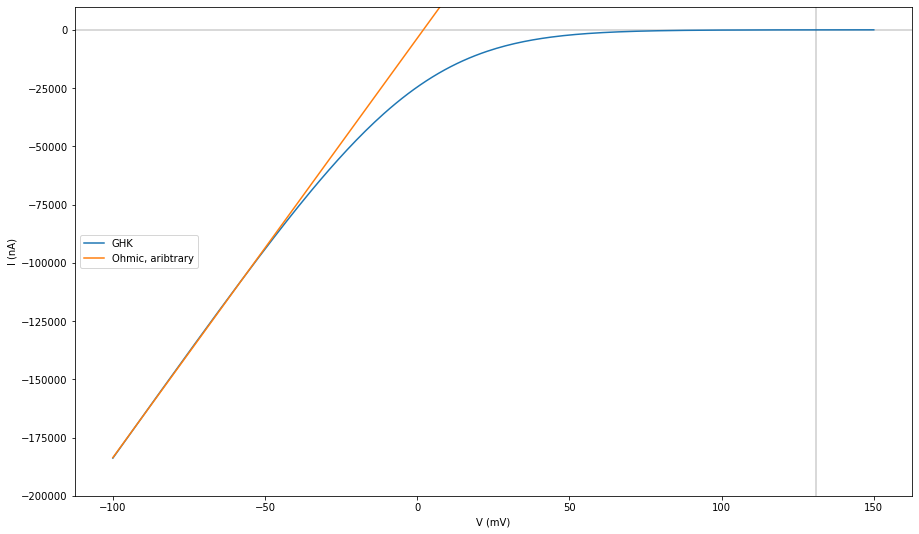

In [37]:
gk = peq(cai, cae, z=2) * 4 * F * F / (R * T)

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('V (mV)')
ax.set_ylabel('I (nA)')
ax.axhline(color='k', alpha=0.2)
ax.axvline(nernst(cai, cae, z=2), color='k', alpha=0.2)
ax.plot(vca, ghk(vca, cai, cae, z=2), label='GHK')
ax.plot(vca, 1.8e3 * (vca - 2), label='Ohmic, aribtrary')
plt.legend()
plt.ylim(-20e4, 1e4)
plt.show()